In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

In [ ]:
###########################################
###########################################
#Switching over to resid2.tmp files
#Creating sublplots for L-band (1-2 GHz), S-band (2-4 GHz), and 430 MHz band (0.3-1 GHz)

In [3]:
import residuals as r

#Define the colormap

from matplotlib.colors import LinearSegmentedColormap

interval=np.hstack([np.linspace(0.05, 0.25), np.linspace(0.35,0.9)])
colors=plt.cm.gist_rainbow(interval)
cmap=LinearSegmentedColormap.from_list('name', colors, 8)

#setting tick numbers for the colorbar too
from matplotlib import ticker

tick_locator = ticker.MaxNLocator(nbins=9)

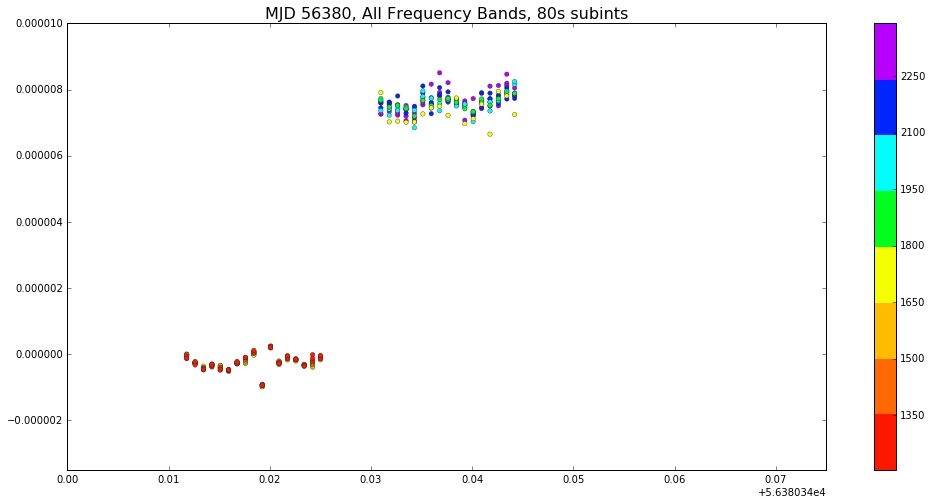

In [9]:
x=r.read_residuals(filename="/nimrod1/eschwab/residuals/resid_56380_80F8.tmp")

#This plot uses all frequency bands
fig,ax = plt.subplots(figsize=(17,8))
cax = ax.scatter(x.bary_TOA, x.prefit_sec, c=x.bary_freq, s=20, edgecolor='#262626', linewidth='0.35', cmap=cmap)
ax.set_title('MJD 56380, All Frequency Bands, 80s subints', fontsize='16')
ax.set_xlim(56380.34, 56380.415)
ax.set_ylim(-0.0000035, 0.00001)
cb=fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()

plt.show()

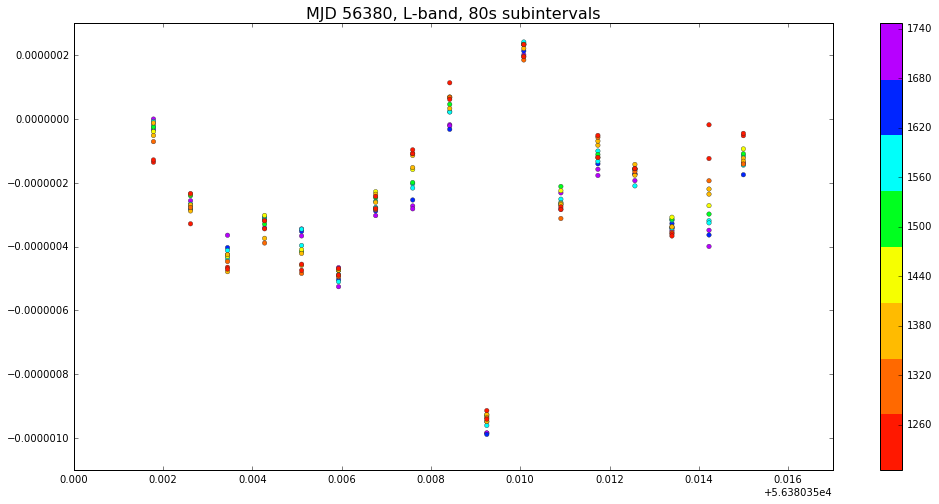

In [35]:
#Now imitating Michael's plots with the lines, looks like he's focusing on the bottom left TOA batch.
#Turns out when using all frequency bands, this section is entirely within the L-band.

#This plot uses all frequency bands

x=r.read_residuals(filename="/nimrod1/eschwab/residuals/resid_56380_80F8.tmp")

fig,ax = plt.subplots(figsize=(17,8))
cax = ax.scatter(x.bary_TOA[(x.bary_TOA > 56380.35) & (x.bary_TOA < 56380.367)], 
                 x.prefit_sec[(x.bary_TOA > 56380.35) & (x.bary_TOA < 56380.367)], 
                 c=x.bary_freq[(x.bary_TOA > 56380.35) & (x.bary_TOA < 56380.367)], 
                 s=20, edgecolor='#262626', linewidth='0.35', cmap=cmap)
ax.set_title('MJD 56380, L-band, 80s subintervals', fontsize='16')
ax.set_xlim(56380.35, 56380.367)
ax.set_ylim(-0.0000011, 0.0000003)
fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()

plt.show()

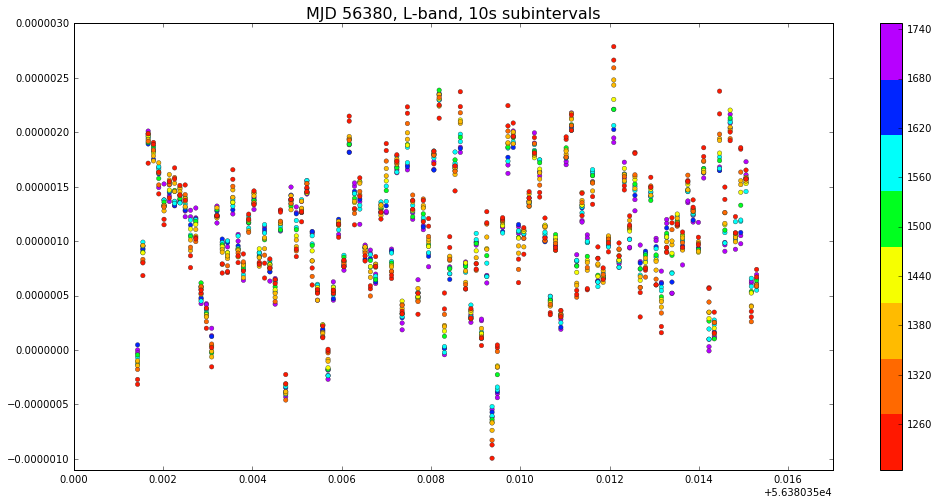

In [39]:
#This plot uses all frequency bands

x=r.read_residuals(filename="/nimrod1/eschwab/residuals/resid_56380_NTF8.tmp")
                   
fig,ax = plt.subplots(figsize=(17,8))
cax = ax.scatter(x.bary_TOA[(x.bary_TOA > 56380.35) & (x.bary_TOA < 56380.367)], 
                 x.prefit_sec[(x.bary_TOA > 56380.35) & (x.bary_TOA < 56380.367)], 
                 c=x.bary_freq[(x.bary_TOA > 56380.35) & (x.bary_TOA < 56380.367)], 
                 s=20, edgecolor='#262626', linewidth='0.35', cmap=cmap)
ax.set_title('MJD 56380, L-band, 10s subintervals', fontsize='16')
ax.set_xlim(56380.35, 56380.367)
ax.set_ylim(-0.0000011, 0.000003)
fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()

plt.show()

In [ ]:
print max(x.bary_freq[(x.bary_TOA > 56380.35) & (x.bary_TOA < 56380.367)])
print min(x.bary_freq[(x.bary_TOA > 56380.35) & (x.bary_TOA < 56380.367)])

In [ ]:
1725-1227

In [18]:
498/10

49

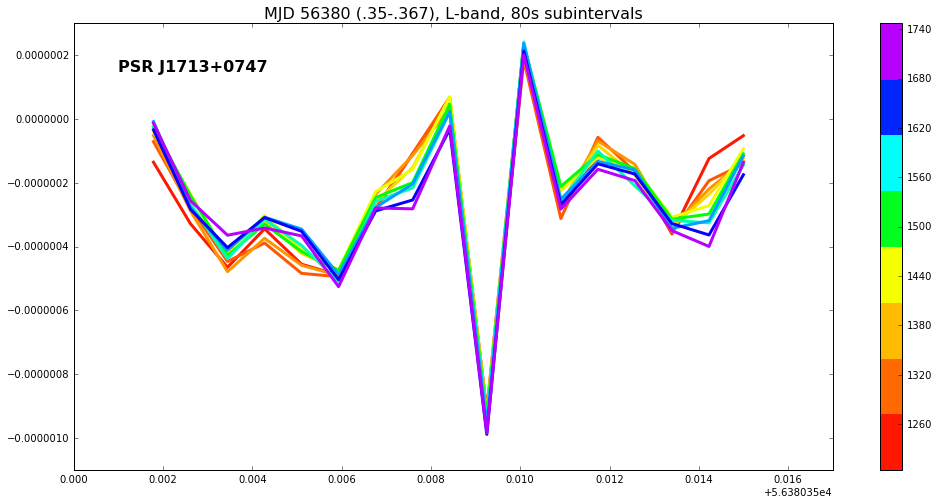

In [41]:
#Create a plot that goes up by increments of 62 and then plots each line as a different color.
#This uses the same section as the Lam plot

x=r.read_residuals(filename="/nimrod1/eschwab/residuals/resid_56380_80F8.tmp")

#Define the colormap

interval=np.hstack([np.linspace(0.05, 0.25), np.linspace(0.35,0.9)])
colors=plt.cm.gist_rainbow(interval)
cmap_lines=LinearSegmentedColormap.from_list('name', colors, 10)

#setting tick numbers for the colorbar too
tick_locator_lines = ticker.MaxNLocator(nbins=7)


TOA=x.bary_TOA[(x.bary_TOA > 56380.35) & (x.bary_TOA < 56380.367)]
Resid=x.prefit_sec[(x.bary_TOA > 56380.35) & (x.bary_TOA < 56380.367)]
Freq=x.bary_freq[(x.bary_TOA > 56380.35) & (x.bary_TOA < 56380.367)]

n = 1227
m = 1278
fig,ax = plt.subplots(figsize=(17,8))


for i in range (0,10):
    ax.plot(TOA[(Freq > n) & (Freq < m)], 
                  Resid[(Freq > n) & (Freq < m)], color=cmap_lines(i), lw=3)
    ax.set_title('MJD 56380 (.35-.367), L-band, 80s subintervals', fontsize='16')
    ax.set_xlim(56380.35, 56380.367)
    ax.set_ylim(-0.0000011, 0.0000003)
    n=n+49
    m=m+49
ax.annotate('PSR J1713+0747', xy=(56380.351,0.00000015), fontweight='bold', fontsize='16')
fig.colorbar(cax)
plt.show()

#need to fix the colorbar - right now it's calling the plot above (8-color)

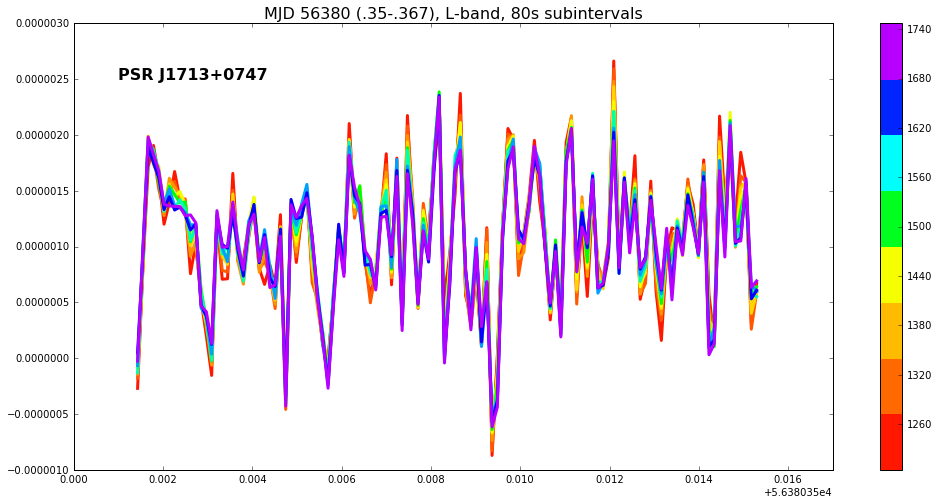

In [42]:
x=r.read_residuals(filename="/nimrod1/eschwab/residuals/resid_56380_NTF8.tmp")

#Define the colormap

interval=np.hstack([np.linspace(0.05, 0.25), np.linspace(0.35,0.9)])
colors=plt.cm.gist_rainbow(interval)
cmap_lines=LinearSegmentedColormap.from_list('name', colors, 10)

#setting tick numbers for the colorbar too
tick_locator_lines = ticker.MaxNLocator(nbins=7)


TOA=x.bary_TOA[(x.bary_TOA > 56380.35) & (x.bary_TOA < 56380.367)]
Resid=x.prefit_sec[(x.bary_TOA > 56380.35) & (x.bary_TOA < 56380.367)]
Freq=x.bary_freq[(x.bary_TOA > 56380.35) & (x.bary_TOA < 56380.367)]

n = 1227
m = 1278
fig,ax = plt.subplots(figsize=(17,8))


for i in range (0,10):
    ax.plot(TOA[(Freq > n) & (Freq < m)], 
                  Resid[(Freq > n) & (Freq < m)], color=cmap_lines(i), lw=3)
    ax.set_title('MJD 56380 (.35-.367), L-band, 80s subintervals', fontsize='16')
    ax.set_xlim(56380.35, 56380.367)
    ax.set_ylim(-0.000001, 0.000003)
    n=n+49
    m=m+49
ax.annotate('PSR J1713+0747', xy=(56380.351,0.0000025), fontweight='bold', fontsize='16')
fig.colorbar(cax)
plt.show()

#need to fix the colorbar - right now it's calling the plot above (8-color)

In [ ]:
## =============================
## Running everything on a different pulsar, PSR-B1937+21
## =============================